**Shakhyry Walsh**  
IS 362: Data Acquisition and Management  
Professor Larry Cohen  
10/19/2025


# Week 8 Assignment - "Auto MPG" Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load the Dataset

In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

columns = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model_year", "origin", "car_name"
]

df = pd.read_csv(url, names=columns, delim_whitespace=True, na_values="?")
df.head()

C:\Users\Shakh\AppData\Local\Temp\ipykernel_30548\3268735017.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, names=columns, delim_whitespace=True, na_values="?")


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Review the Data

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Handle Missing Values

In [15]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df = df.dropna(subset=["horsepower"])
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

### Convert Values

In [8]:
origin_map = {1: "USA", 2: "Asia", 3: "Europe"}
df["origin"] = df["origin"].map(origin_map)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


### Cylinder Distribution Bar Chart

C:\Users\Shakh\AppData\Local\Temp\ipykernel_30548\4185728464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="cylinders", palette="pastel")


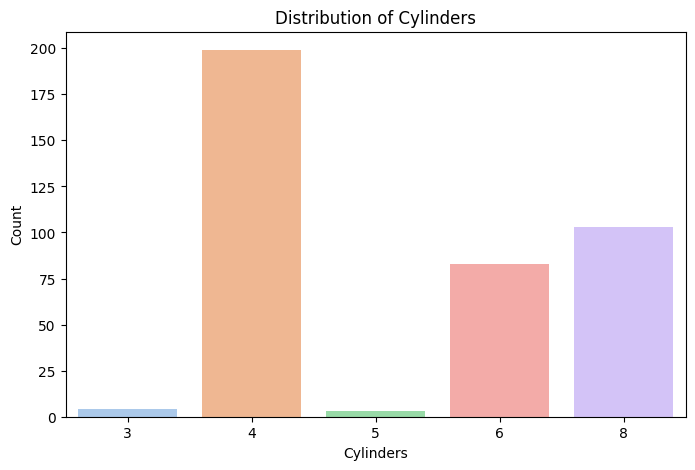

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="cylinders", palette="pastel")
plt.title("Distribution of Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Count")
plt.show()

### Horsepower and Weight Scatterplot

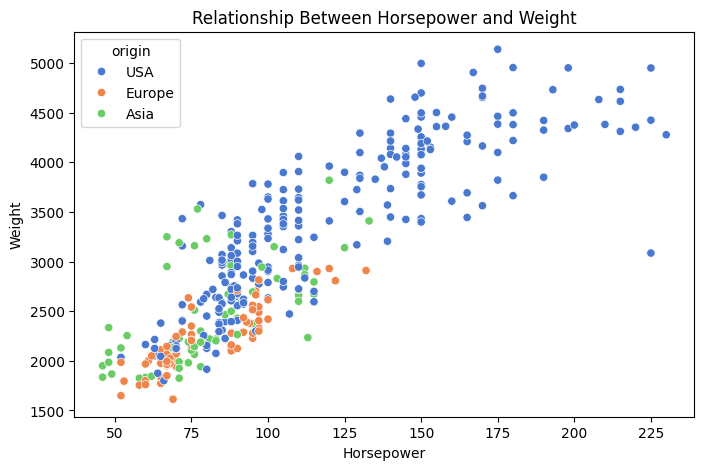

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="horsepower", y="weight", hue="origin", palette="muted")
plt.title("Relationship Between Horsepower and Weight")
plt.xlabel("Horsepower")
plt.ylabel("Weight")
plt.show()

### Question
How does fuel efficiency (MPG) vary by the number of cylinders and origin?

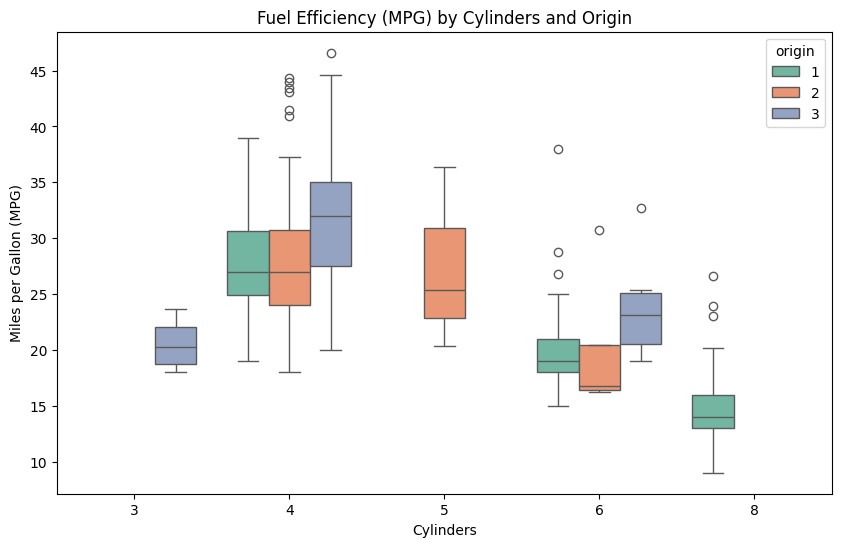

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="cylinders", y="mpg", hue="origin", palette="Set2")
plt.title("Fuel Efficiency (MPG) by Cylinders and Origin")
plt.xlabel("Cylinders")
plt.ylabel("Miles per Gallon (MPG)")
plt.show()

**Answer:** Cars with fewer cylinders tend to have higher MPG, and vehicles from Asia generally perform better in terms of fuel efficiency.